In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import numpy as np
import math

In [3]:
# Коэффициент для распределения хи-квадрат
k = 6
# Размер выборок 
size = 1000

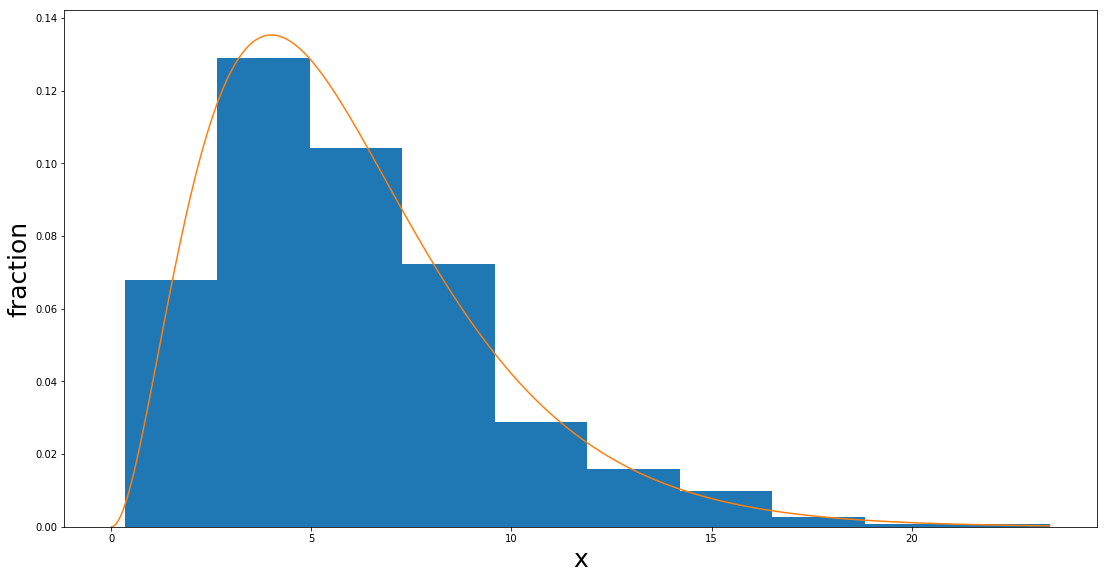

In [4]:
# Генерация выборки для гистограммы 
sample = stat.chi2.rvs(k, size=size)
# Генерация данных для построения теоретического распределения
x = np.arange(0, sample.max(), 0.01)
data = stat.chi2.pdf(x, k)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 9.5)
ax.set_xlabel('x', fontsize=25)
ax.set_ylabel('fraction', fontsize=25)

ax.hist(sample, density=True)
ax.plot(x, data)

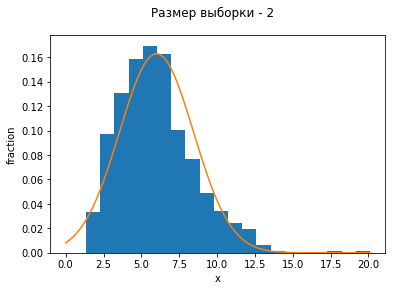

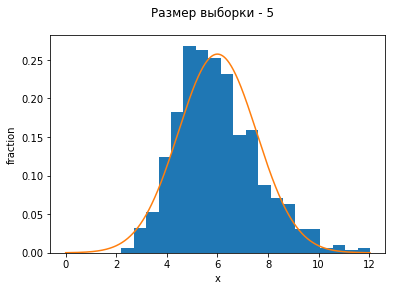

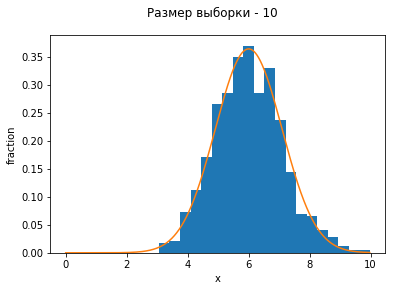

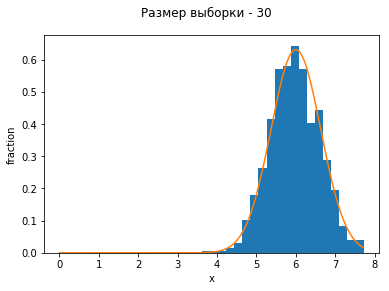

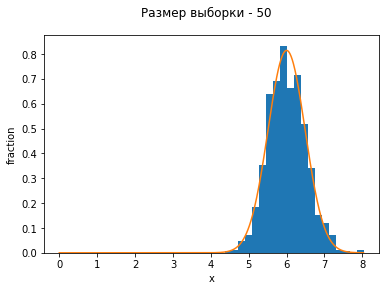

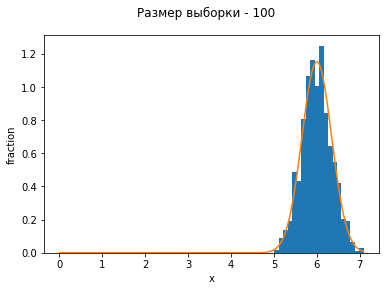

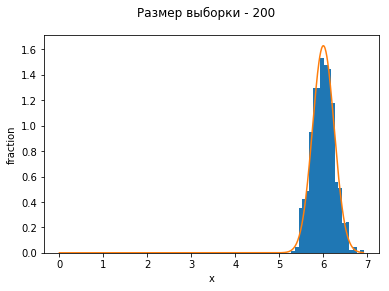

In [80]:
# Создание гистограмм для разных объемов выборок из списка
for n in (2,5,10,30,50,100,200):
    # Внутри генератора создается {size} выборок, у которых сразу же ищется среднее арифметическое
    # Из результатов строятся данные для гистограмм
    data = [sum(stat.chi2.rvs(k, size=n))/n for x in range(size)]
    
    x=np.arange(0,max(data),0.01)
    
    fig, ax = plt.subplots()
    fig.suptitle('Размер выборки - ' + str(n))
    ax.set_xlabel('x')
    ax.set_ylabel('fraction')
    
    ax.hist(data, bins=20, density=True)
    # Для нормального распределения беру теоретическое матожидание из википедии равное k
    # Дисперсия согласно википедии равна 2k
    ax.plot(x, stat.norm.pdf(x, k, math.sqrt(2*k/n)))

На первых трех гистограммах довольно часто появляются столбцы, которые выбиваются из нормального распределения. Однако, чем больше объем выборок, тем точнее идет аппроксимация. Так же видно, что при больших n график все сильнее сжимается к величине матожидания.